In [1]:
from data.data_collector import DataCollector

In [1]:
from evaluation3 import evaluate_two_datasets, evaluate_models, evaluate_autoencoder

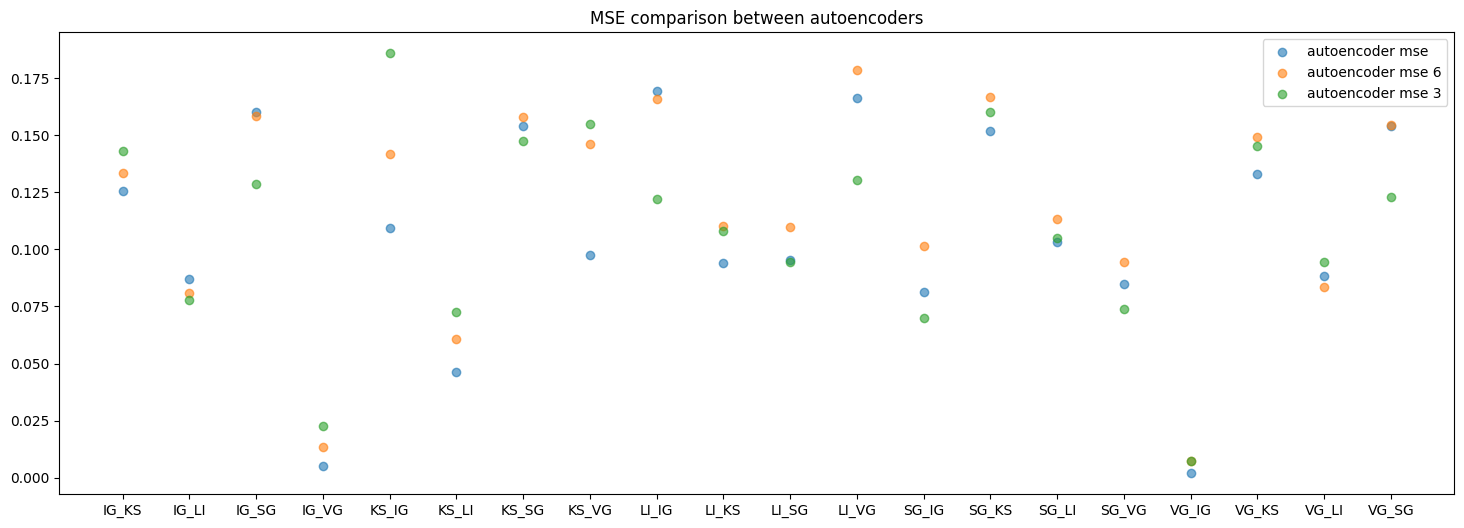

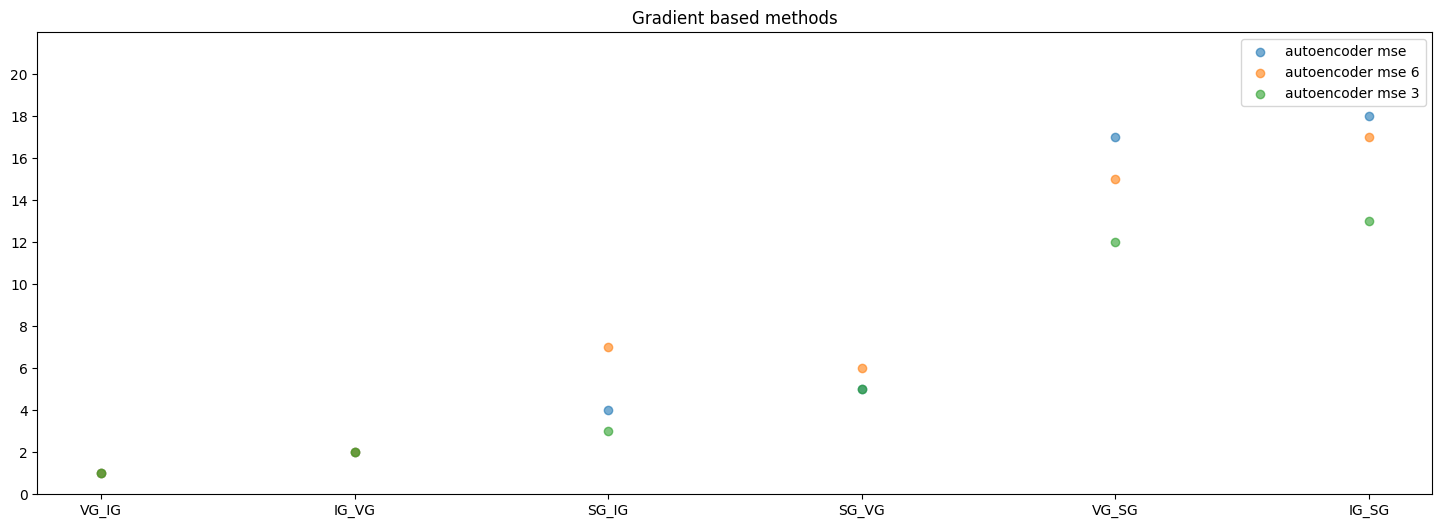

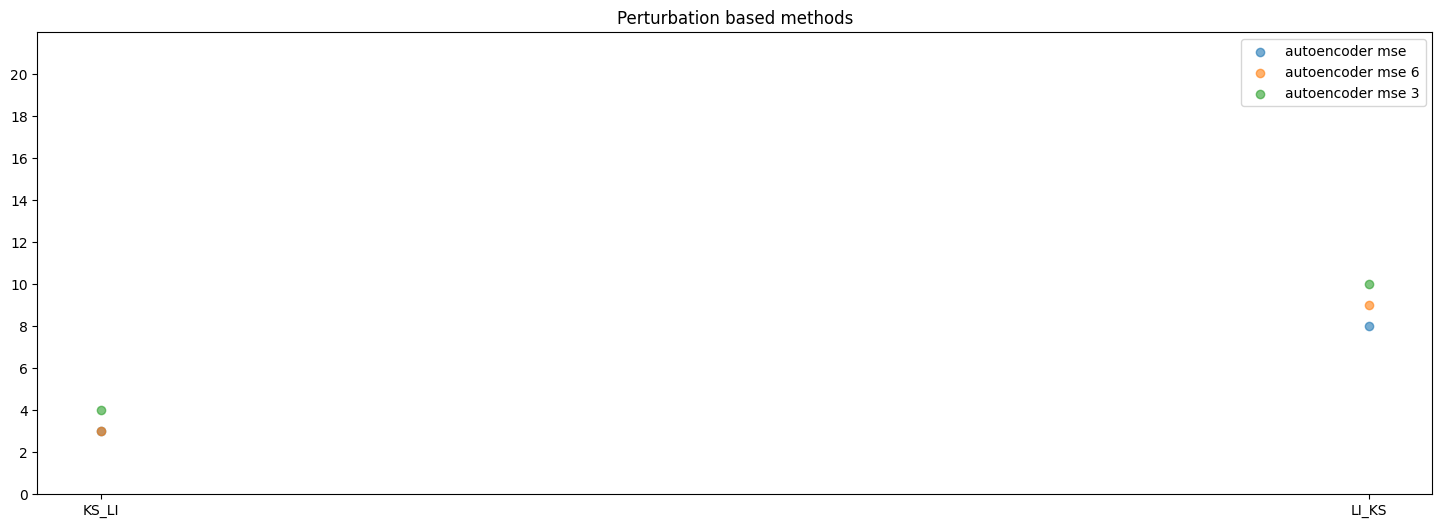

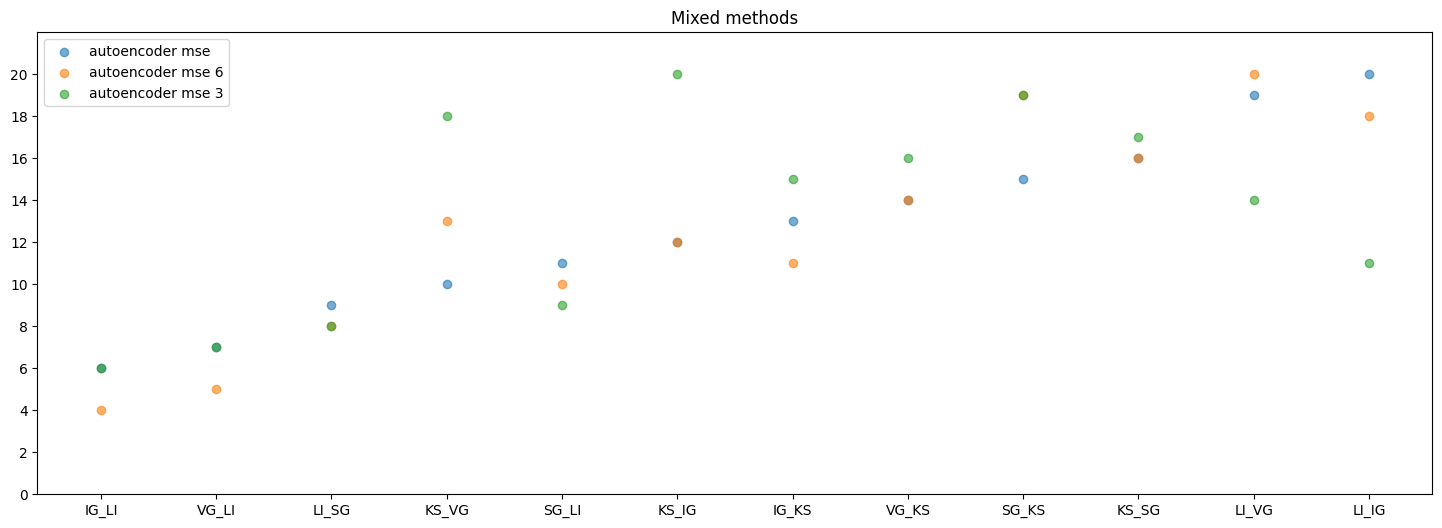

7.277777777777778
6.166666666666667
12.833333333333334


In [7]:
evaluate_autoencoder(explanation_set='breastw', num_epochs=20, lr=0.01, batch_size=16)

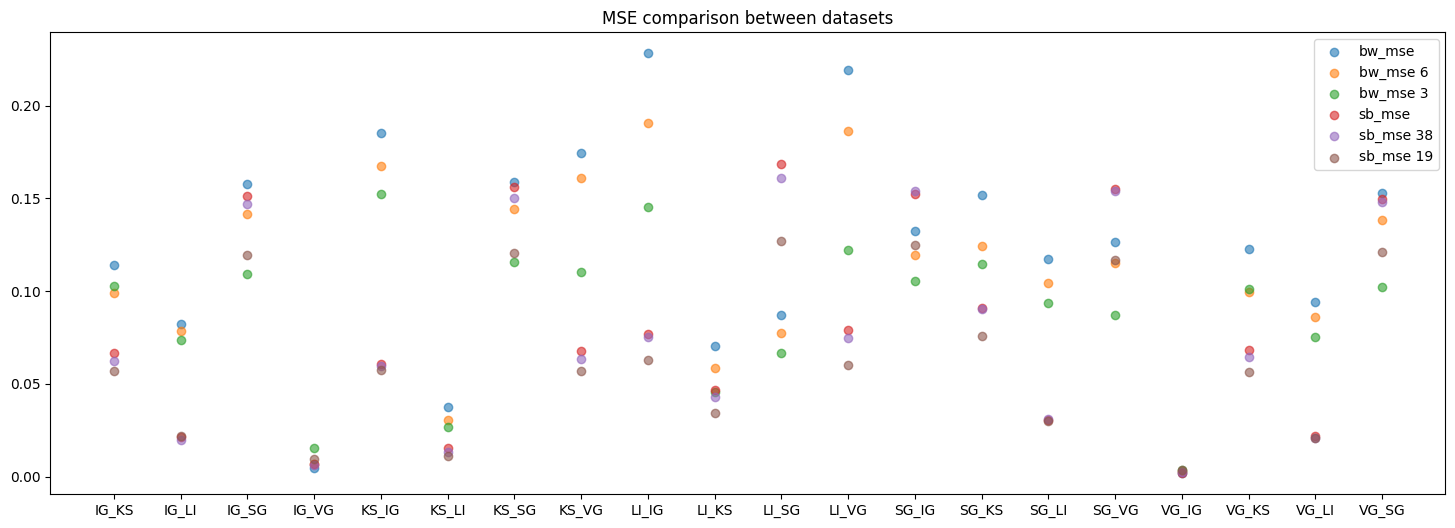

{'VG_IG': [1, 1, 1, 1, 1, 1], 'IG_VG': [2, 2, 2, 2, 2, 2], 'SG_VG': [11, 11, 8, 18, 18, 15], 'SG_IG': [12, 12, 13, 17, 19, 19], 'VG_SG': [14, 14, 11, 15, 16, 18], 'IG_SG': [15, 15, 14, 16, 15, 16]}


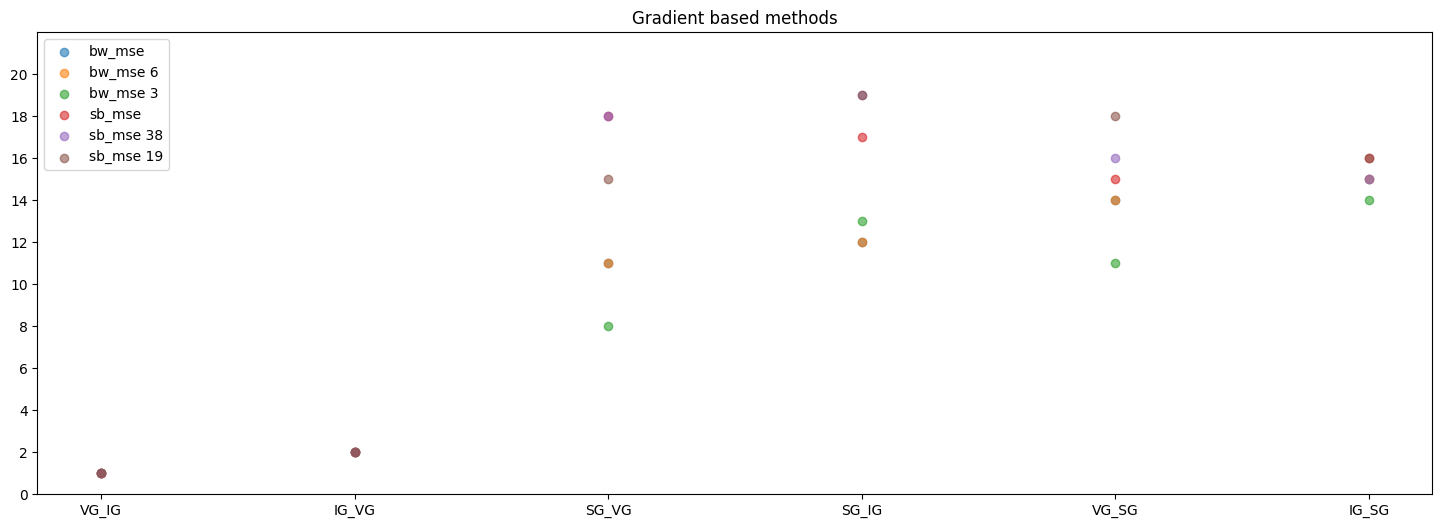

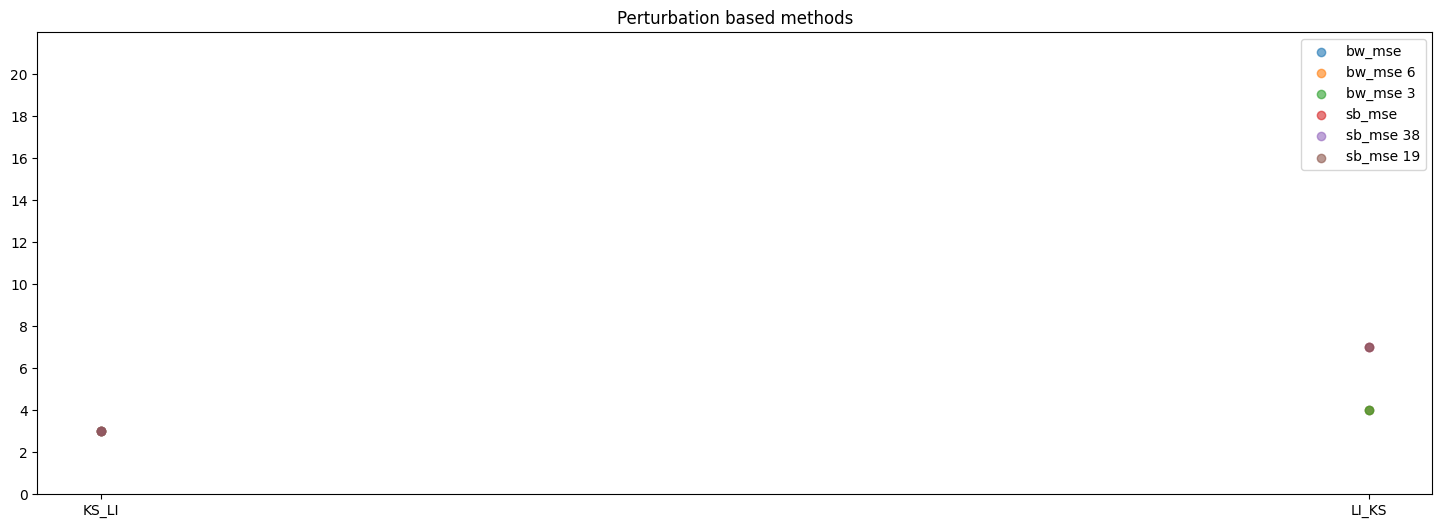

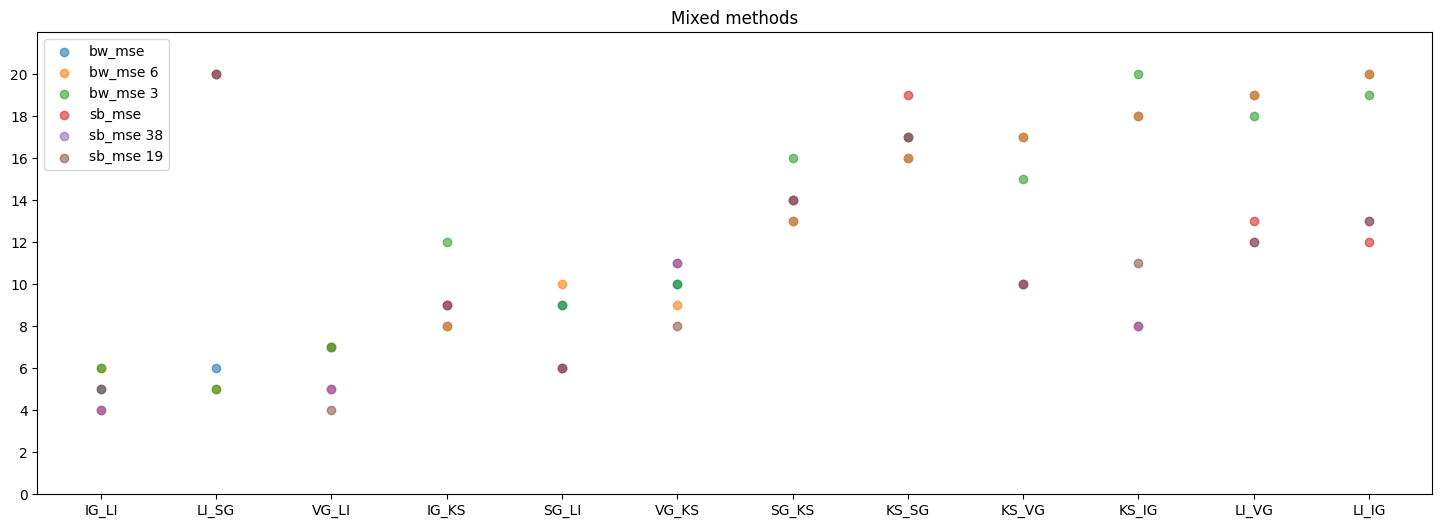

10.277777777777779
4.25
11.652777777777779


In [3]:
evaluate_two_datasets(1, 1)

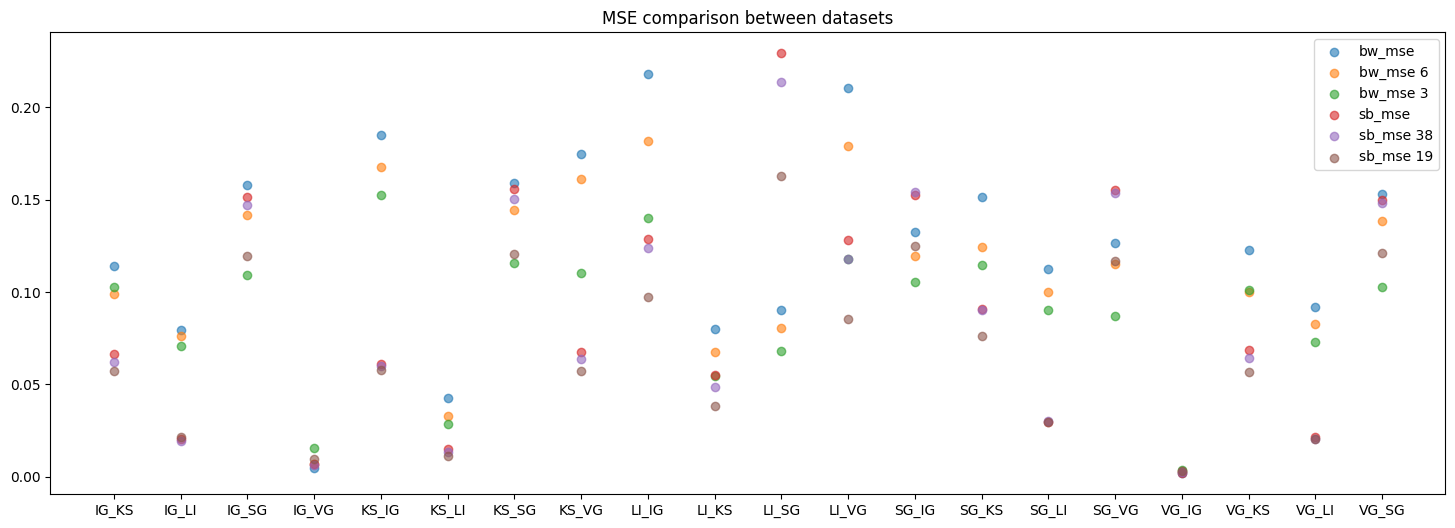

{'VG_IG': [1, 1, 1, 1, 1, 1], 'IG_VG': [2, 2, 2, 2, 2, 2], 'SG_VG': [11, 11, 8, 18, 18, 15], 'SG_IG': [12, 12, 13, 17, 19, 19], 'VG_SG': [14, 14, 11, 15, 16, 18], 'IG_SG': [15, 15, 14, 16, 15, 16]}


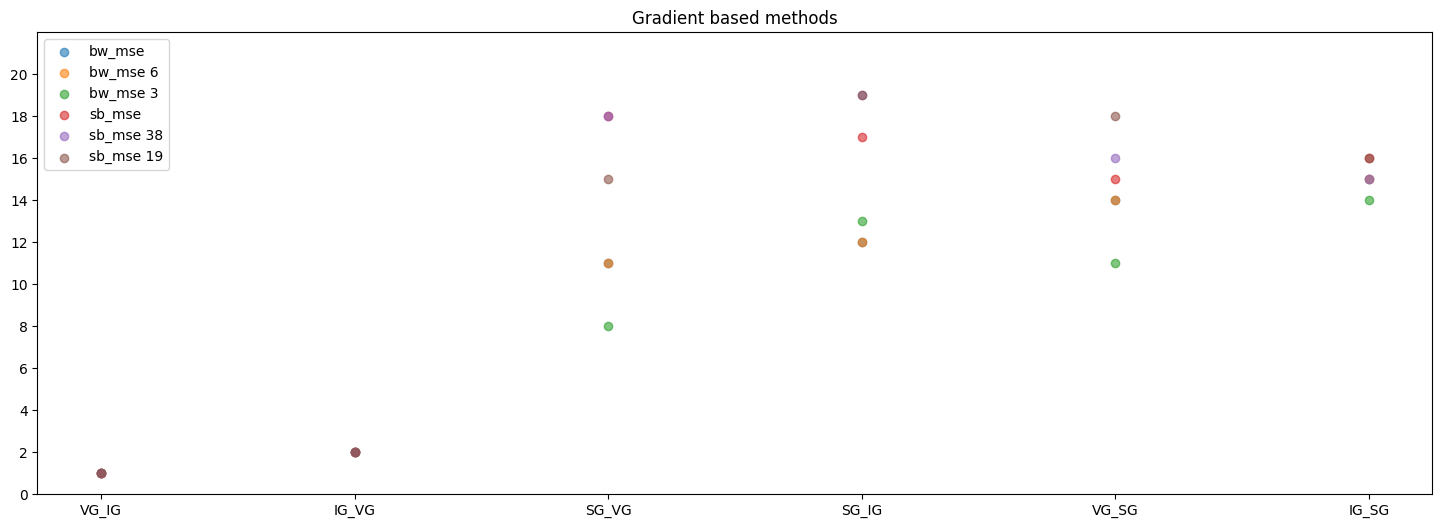

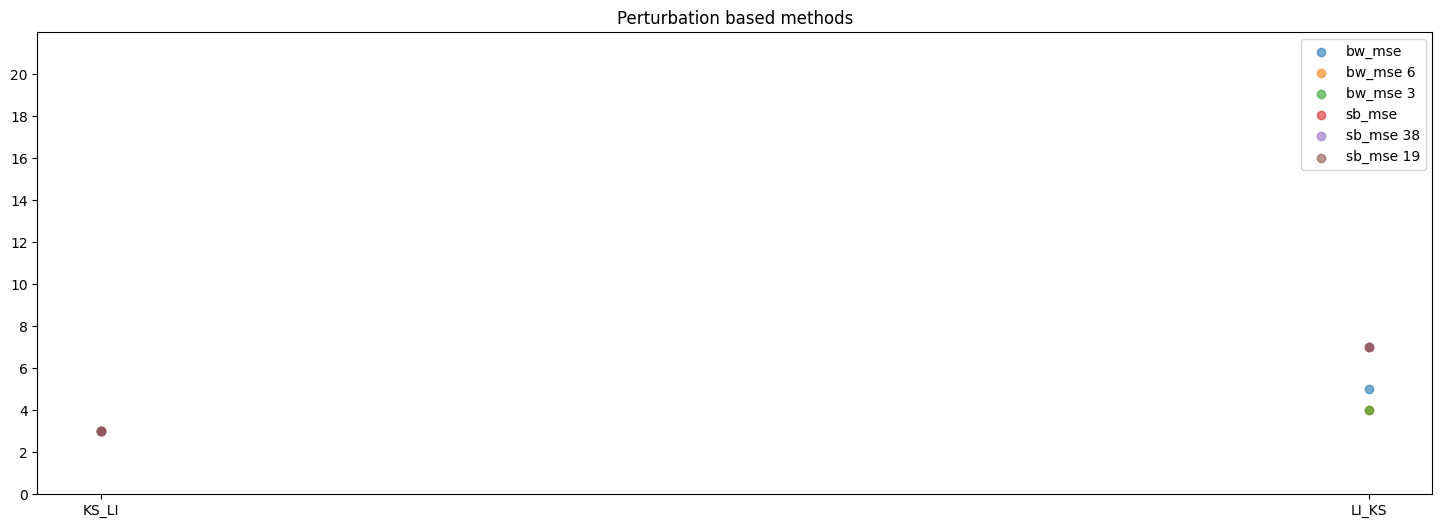

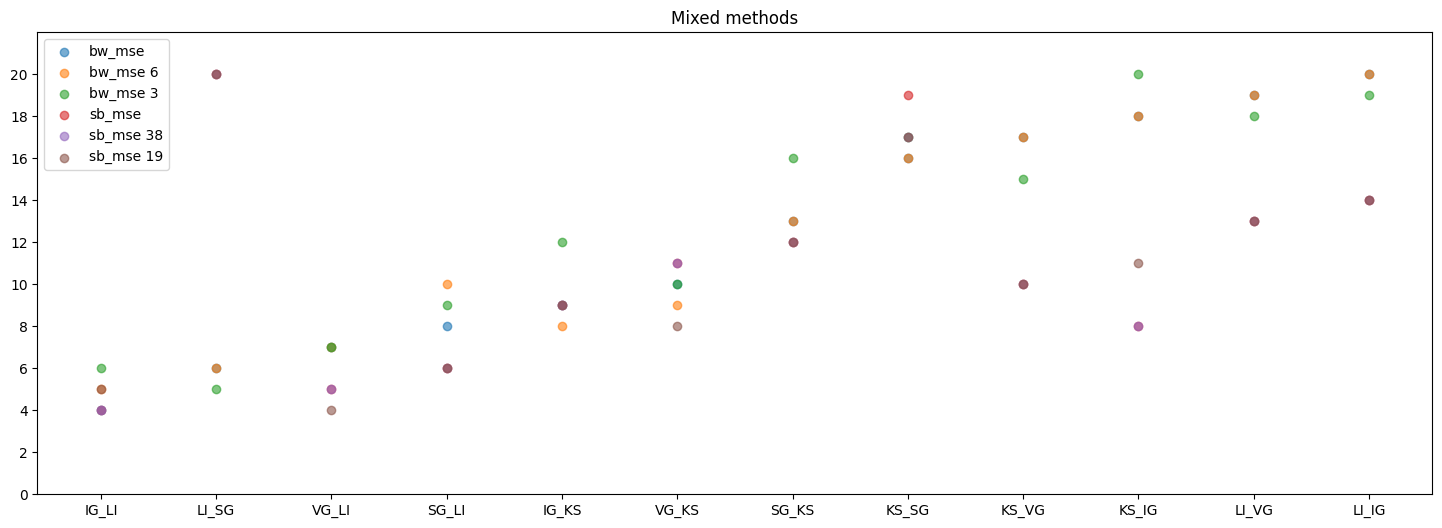

10.277777777777779
4.333333333333333
11.63888888888889


In [5]:
evaluate_two_datasets(2, 3)

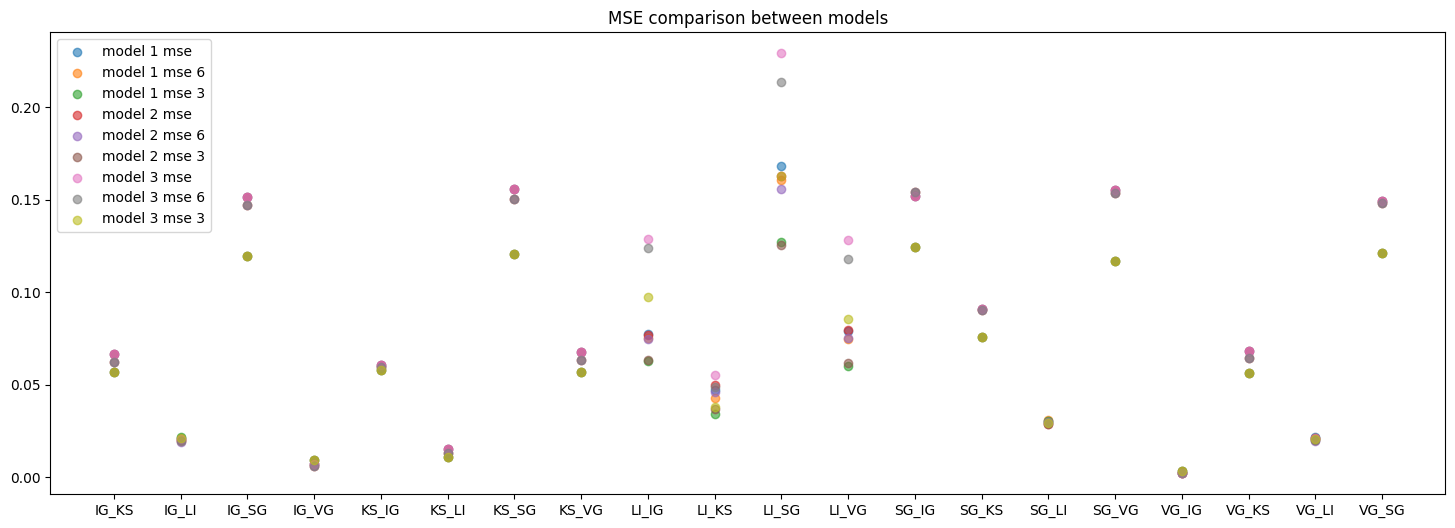

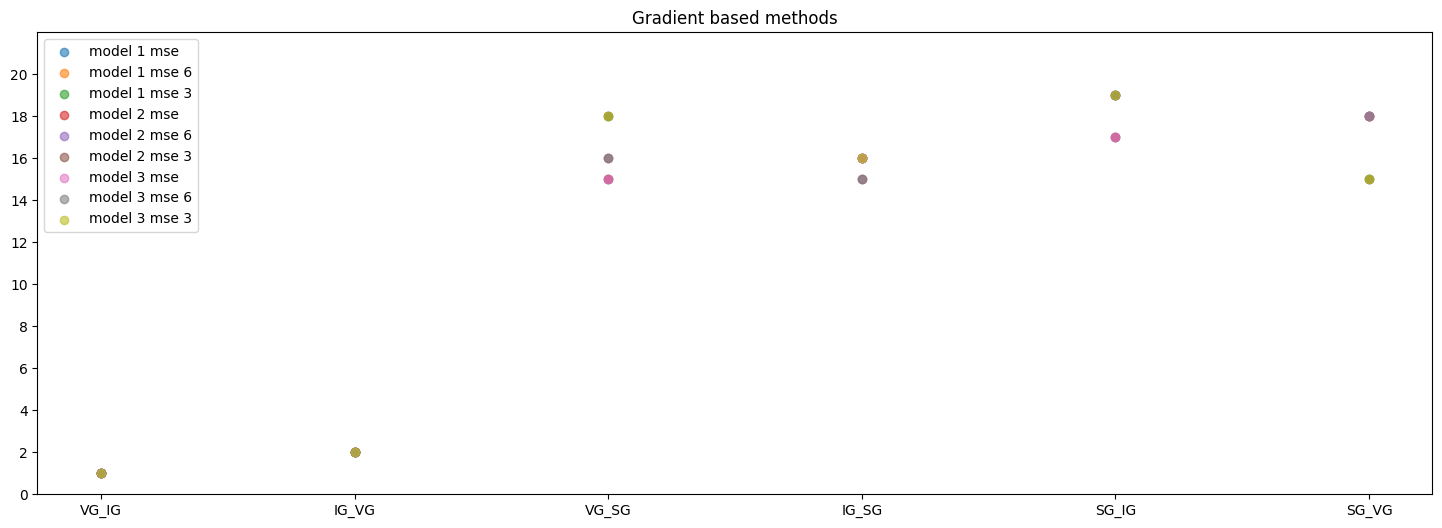

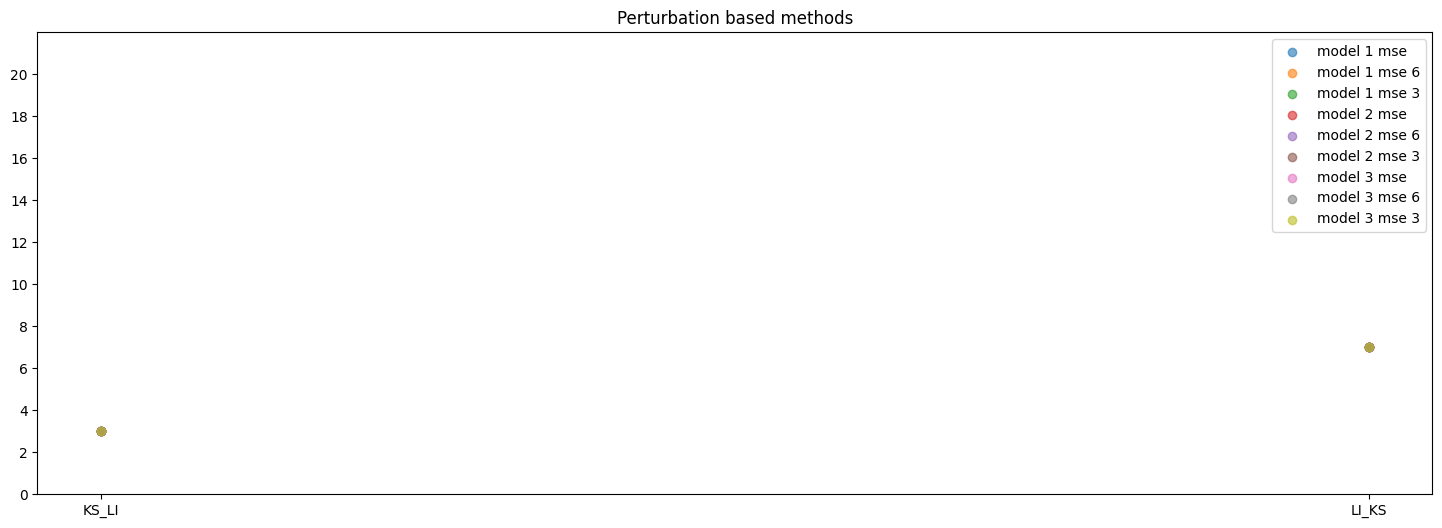

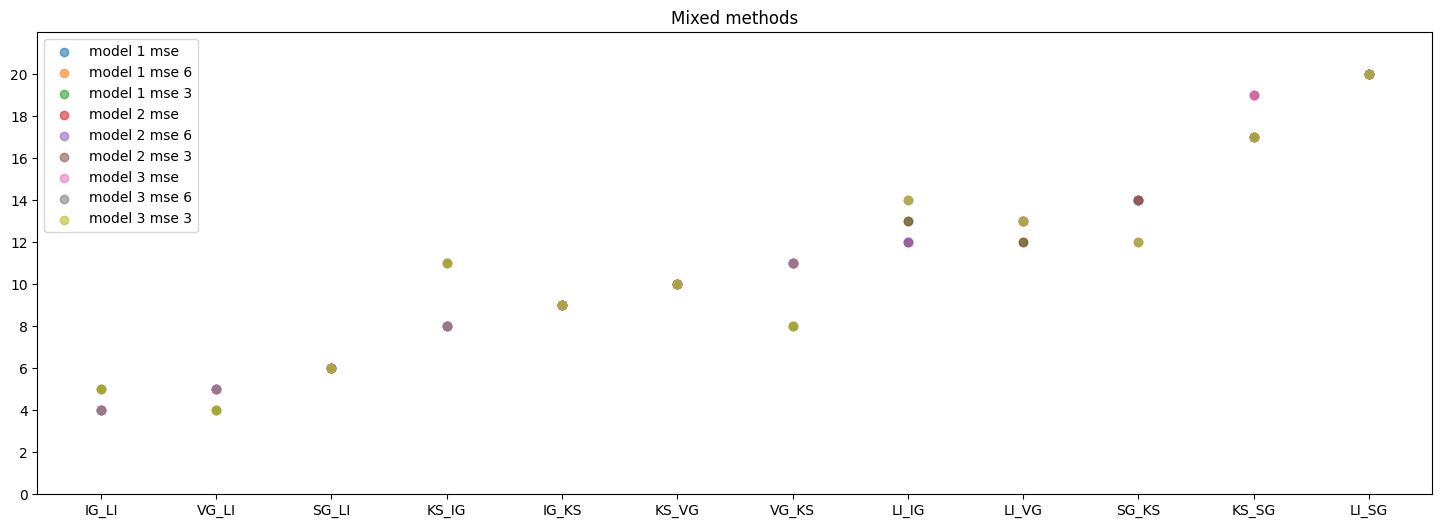

11.722222222222221
5.0
10.805555555555555


In [3]:
evaluate_models('spambase')

In [4]:
dc_sb = DataCollector('spambase')
dc_bw = DataCollector('breastw')


In [5]:
from evaluation.linear_translator import translate_kfold
import torch
import numpy as np

In [6]:
index_list = dc_bw.find_lime_zero_explanations()
non_index_list = [i for i in range(0, 1000) if i not in index_list]


In [7]:
from evaluation.numerical_evaluation import calculate_variance

In [8]:
print(calculate_variance(dc_bw.scaled_explanations, False, True))

{0: tensor([0.8843, 0.1680, 0.4737, 0.0551, 0.1356, 0.3657, 0.1584, 0.1224, 0.2247]), 1: tensor([0.3612, 0.1104, 0.1815, 0.0858, 0.1126, 0.1995, 0.1382, 0.1313, 0.1291]), 2: tensor([0.2503, 0.0159, 0.1737, 0.0049, 0.0281, 0.1721, 0.0648, 0.0287, 0.0475]), 3: tensor([0.5303, 0.0927, 0.1992, 0.0502, 0.0703, 0.2421, 0.1437, 0.0796, 0.1363]), 4: tensor([0.6151, 0.1277, 0.4458, 0.0636, 0.1123, 0.4575, 0.1550, 0.1387, 0.2985])}


In [9]:
from evaluation.linear_translator import compare_to_mean_baseline


In [10]:
from evaluation.linear_translator import translate, translate_pairwise
import numpy as np
# from sklearn.metrics import mean_squared_error

In [11]:
r2_scaled, mse_scaled, mse_baseline, variance = translate_pairwise(dc_bw.scaled_explanations, dc_bw.non_zero_explanations)
masked_indices3, masked_indices_non_zero3 = dc_bw.mask_features(3, 0, True)
r2_masked3, mse_masked3, mse_baseline3, variance3 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices3, non_zero_masked_indices=masked_indices_non_zero3)
masked_indices6, masked_indices_non_zero6 = dc_bw.mask_features(6, 0, True)
r2_masked6, mse_masked6, mse_baseline6, variance6 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations, masked=True, masked_indices=masked_indices6, non_zero_masked_indices=masked_indices_non_zero6)

In [12]:
from evaluation.autoencoder_training import translate_with_autoencoder
from evaluation.autoencoder import Autoencoder

In [13]:
ae = Autoencoder(9, 6)
mse_ae = translate_with_autoencoder(ae, dc_bw.scaled_explanations, dc_bw.non_zero_explanations, lr=0.01, batch_size=16)

KeyboardInterrupt: 

In [ ]:
from visualization.translator_fig import visualize_translation_scores, visualize_multiple_scores

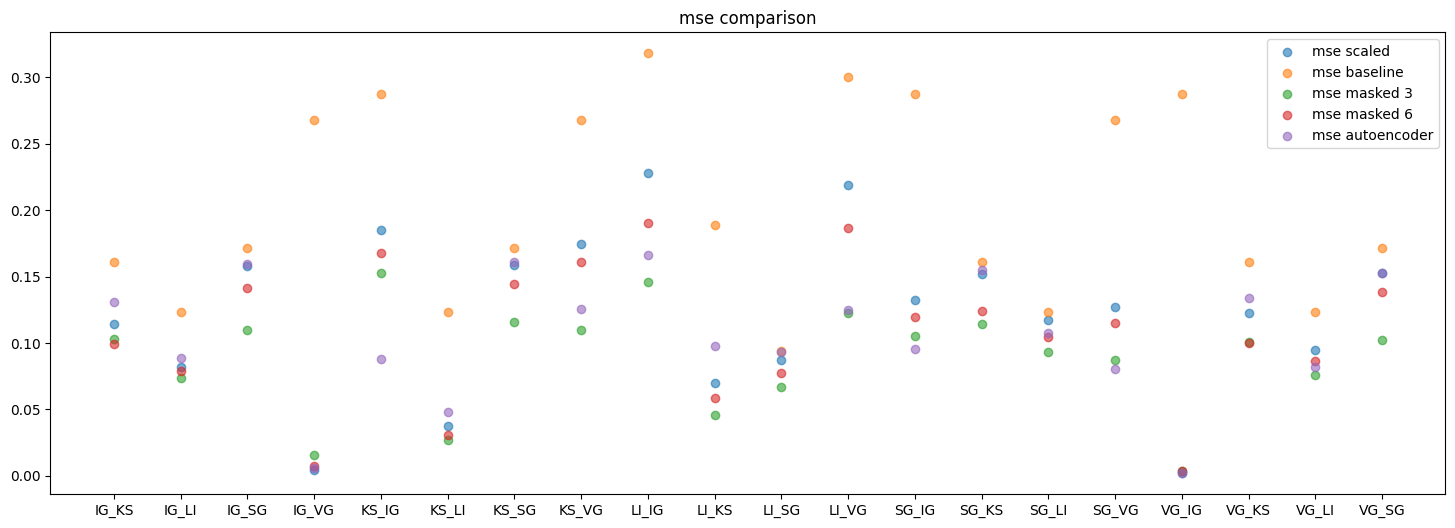

In [ ]:
score_dict = {'mse_scaled': mse_scaled, 'mse_baseline': mse_baseline, 'mse_masked3': mse_masked3, 'mse_masked6': mse_masked6, 'mse_ae': mse_ae}
visualize_multiple_scores(score_dict, ('mse scaled', 'mse baseline', 'mse masked 3', 'mse masked 6', 'mse autoencoder'), 'mse comparison')

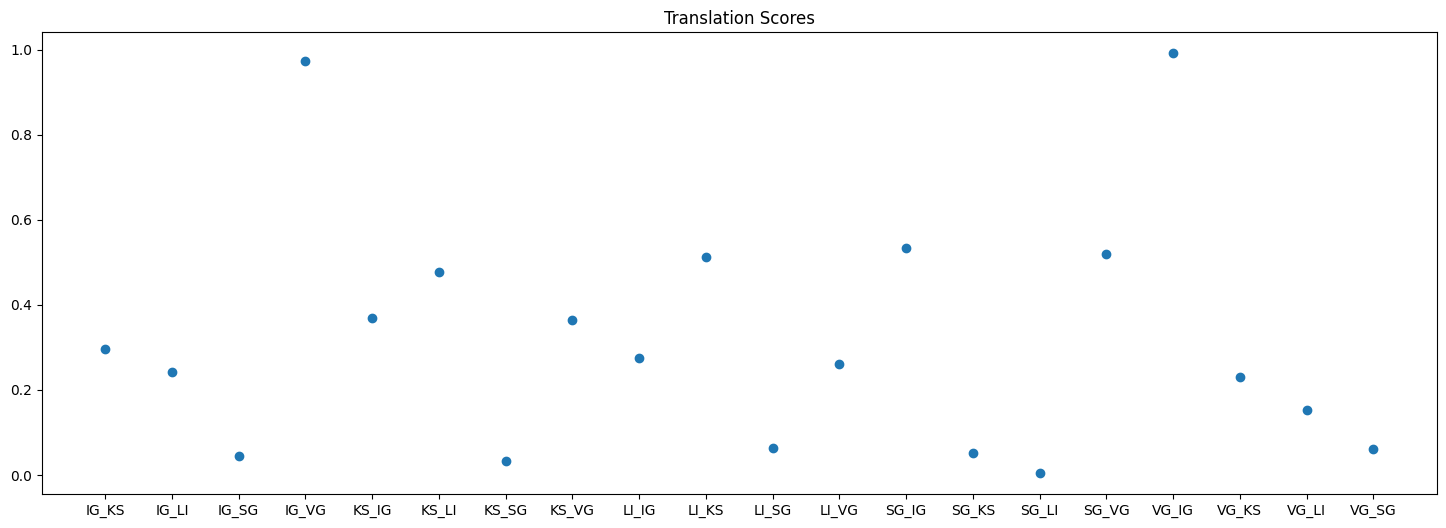

In [ ]:
visualize_translation_scores(r2_scaled)

In [ ]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')

TypeError: visualize_multiple_scores() takes from 3 to 4 positional arguments but 5 were given

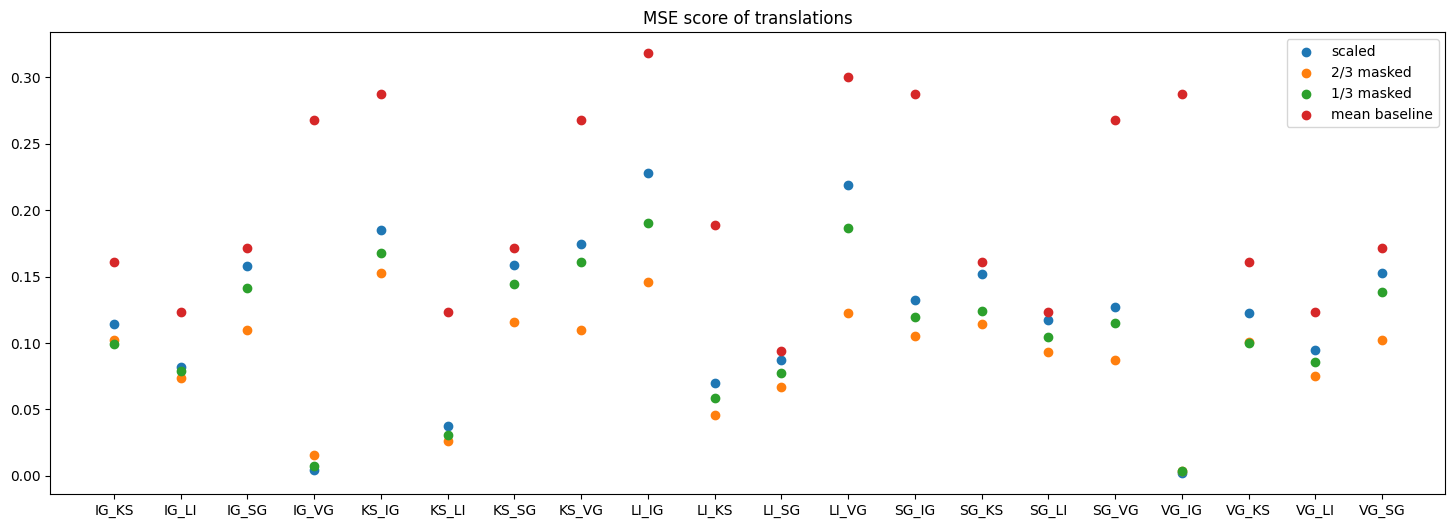

In [ ]:
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.ranking import merge_dictionaries, create_rankings
from visualization.translator_fig import show_rankings

In [ ]:
mse_scaled_ranking = create_rankings(mse_scaled)
mse_masked3_ranking = create_rankings(mse_masked3)
mse_masked6_ranking = create_rankings(mse_masked6)

In [ ]:
merged_dict = merge_dictionaries(mse_scaled_ranking, mse_masked3_ranking, mse_masked6_ranking)  
show_rankings(merged_dict)

TypeError: show_rankings() missing 1 required positional argument: 'label'

In [ ]:
from evaluation.ranking import separate_concepts

In [ ]:
grad_dict, perturb_dict, mixed_dict = separate_concepts(merged_dict)

NameError: name 'merged_dict' is not defined

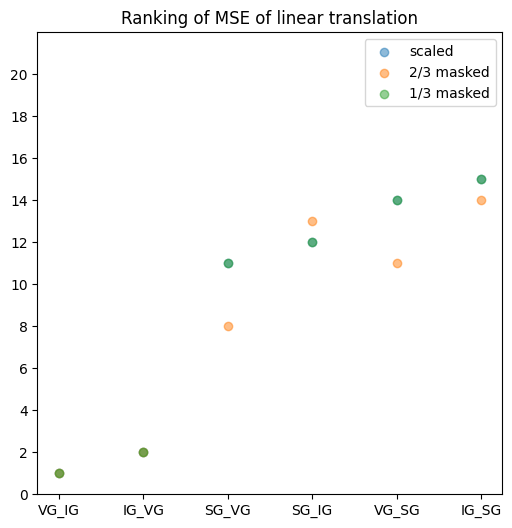

In [ ]:
show_rankings(grad_dict, figsize=(6, 6))

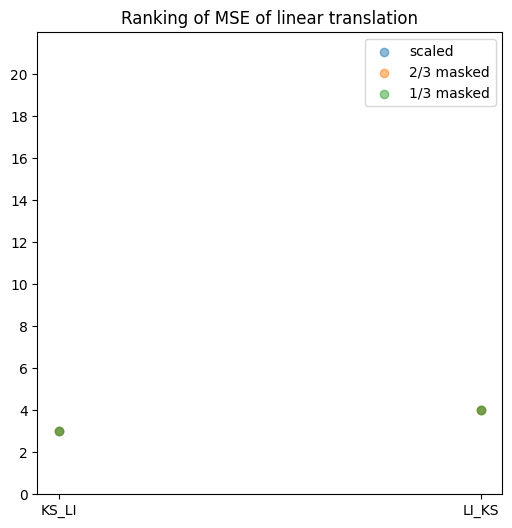

In [ ]:
show_rankings(perturb_dict, figsize=(6,6))

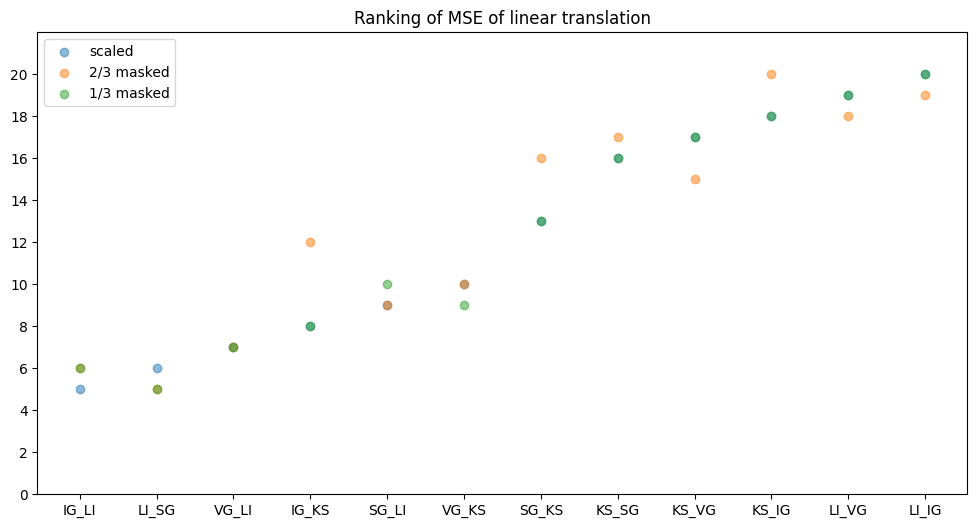

In [ ]:
show_rankings(mixed_dict, figsize=(12,6))

In [4]:
print(np.mean(list(grad_dict.values())))
print(np.mean(list(perturb_dict.values())))
print(np.mean(list(mixed_dict.values())))

NameError: name 'np' is not defined

In [ ]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_sb.scaled_explanations, dc_sb.non_zero_explanations)
dc_sb.mask_features(19, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)
dc_sb.mask_features(38, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)

In [ ]:
visualize_translation_scores(r2_scaled)
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

NameError: name 'visualize_translation_scores' is not defined

In [ ]:
dc_spf = DataCollector('spf')
dc_spf.create_non_zero_dataset()

tensor([[-4.5482e-01, -6.1059e-02, -5.7879e-02,  ...,  7.2226e-02,
         -2.7875e-01,  0.0000e+00],
        [-2.5703e-01,  1.1847e-01, -2.6198e-01,  ...,  8.0506e-01,
          1.2969e-01,  0.0000e+00],
        [ 7.2509e-02, -6.8391e-02, -5.1678e-01,  ...,  4.7175e-02,
         -2.9617e-02,  0.0000e+00],
        ...,
        [-4.7016e-01, -9.7888e-01,  2.8577e-01,  ..., -5.0615e-01,
         -3.2090e-01,  4.0000e+00],
        [-4.2756e-01, -8.8650e-01,  1.1033e-01,  ..., -1.9538e-01,
          7.0556e-02,  4.0000e+00],
        [-3.1797e-03,  3.9915e-01,  1.2019e-01,  ...,  3.6589e-01,
          3.4891e-01,  4.0000e+00]])

In [ ]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_spf.scaled_explanations, dc_spf.non_zero_explanations)
dc_spf.mask_features(8, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)
dc_spf.mask_features(16, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)

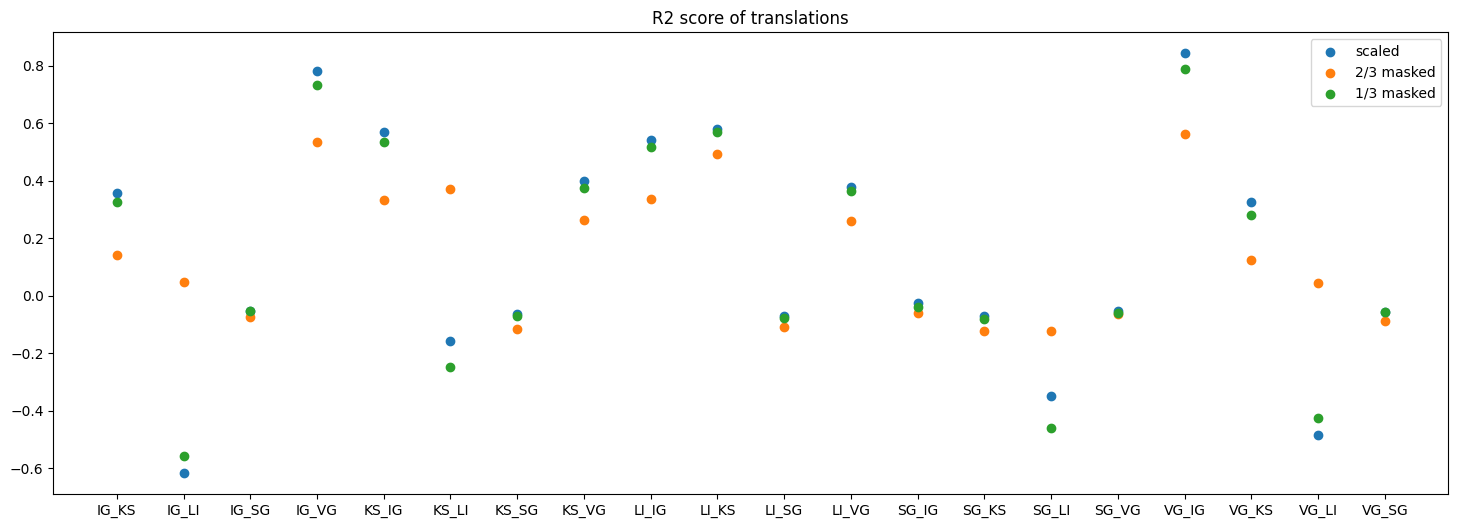

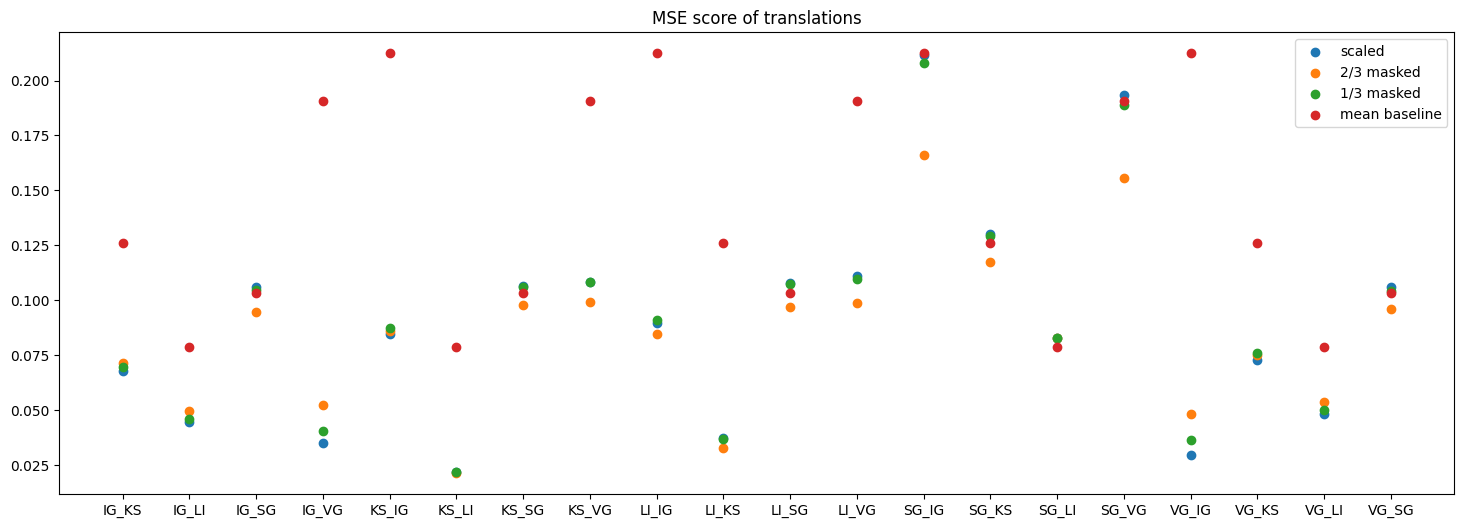

In [ ]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.numerical_evaluation import count_features_per_method, count_feature_amount, count_lime_features


In [ ]:
print(dc_bw.explanation_set['breastw_273117_11880_EPOCH-BATCH_li.pkl'][3])

In [ ]:
dc_bw.mask_features(4, 0, True)
print(count_lime_features(dc_sb.scaled_explanations[1842:2763]))

# print(count_features_per_method(dc_bw.scaled_explanations, True))
# print(count_features_per_method(dc_bw.masked_explanations, True))
# print(count_feature_amount(dc_bw.scaled_explanations[2000:3000], True))

print(count_lime_features(dc_bw.non_zero_explanations[1212:1818]))

In [ ]:
dc_spf = DataCollector('spf')
print(len(dc_spf.scaled_explanations))
print(count_lime_features(dc_spf.scaled_explanations[778:1167]))

In [ ]:
dc_btsc = DataCollector('btsc')
print(len(dc_btsc.scaled_explanations))
print(count_lime_features(dc_btsc.scaled_explanations[300:450]))

In [ ]:
import torch 


In [ ]:
dc_btsc = DataCollector('btsc')
# print(btsc['btsc_300804_11880_EPOCH-BATCH_li.pkl'])

In [ ]:
from data.preprocessing import scale_data
from data.evaluation_prep import prepare_umap_data
from evaluation.umap import visualize_umap, project_umap
import torch

In [ ]:
spambase = dc.collect_data('spambase')
keys = dc.get_keys(spambase, 1)
umap_sb = prepare_umap_data(spambase, keys, scale=True)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
umap_sb = prepare_umap_data(spambase, keys, scale=False)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
breastw = dc.collect_data('breastw')
keys = dc.get_keys(breastw, 1)
umap_bw = prepare_umap_data(breastw, keys, scale=True)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
umap_bw = prepare_umap_data(breastw, keys, scale=False)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
spf = dc.collect_data('spf')
keys = dc.get_keys(spf, 1)
umap_spf = prepare_umap_data(spf, keys, scale=True)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
umap_spf = prepare_umap_data(spf, keys, scale=False)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
btsc = dc.collect_data('btsc')
keys = dc.get_keys(btsc, 1)
umap_btsc = prepare_umap_data(btsc, keys, scale=True)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)
print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:19])

In [ ]:
umap_btsc = prepare_umap_data(btsc, keys, scale=False)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)

In [ ]:
# btsc10 = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
# print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10])
# btsc10_scaled = btsc10.clone()
# btsc10_scaled[:,-1] = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
# print(btsc10_scaled)
# # print(btsc10)
# btsc10_scaled[:, :-1] = scale_data(btsc10_scaled[:, :-1])
# print(btsc10_scaled)


In [ ]:
from data.preprocessing import mask_features


In [ ]:
btsc_test = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
btsc_test_scaled = scale_data(btsc_test)
# print(btsc_test_scaled)
# print(mask_features(btsc_test_scaled, 0, 2))
